In [12]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### 0. Cargar los datos de estatura y peso

In [13]:
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

### 1. Count records in the dataframe

In [14]:
record_count = len(height_weight_df)
print("Count records: ", record_count)

Count records:  200


### 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

In [15]:
X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



### 3. Hallar el intercepto

In [16]:
intercepto = model.intercept_
print("Intercepto:", intercepto)

Intercepto: -110.85853371676737


### 4. Hacer la gráfica

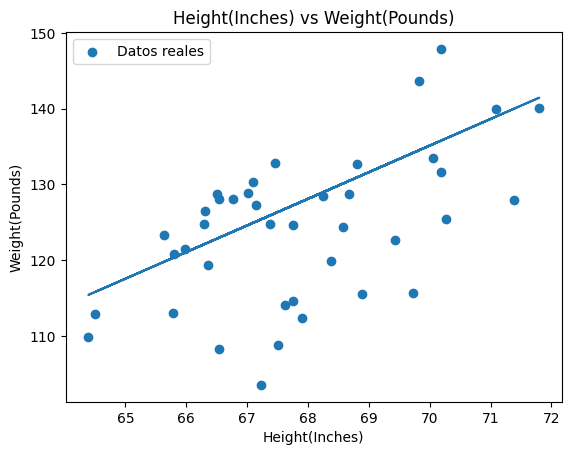

In [17]:
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred)

plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.title('Height(Inches) vs Weight(Pounds)')

plt.legend()
plt.show()

### 5. Hallar correlacion y valor p

In [19]:
correlacion, valor_p = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])

print("Correlación:", correlacion)
print("Valor p:", valor_p)


Correlación: 0.5568647346122995
Valor p: 1.1029015151265877e-17


### 6. Interpretar el valor p

En términos estadísticos, este valor p, que es prácticamente cero, implica que es casi seguro que los resultados no son aleatorios, lo cual sugiere que el efecto observado es real y estadísticamente significativo.

En términos de datos, se puede decir que ambas variables tanto Height como Weight tienen una correlación moderada al estar dentro del rango de 0.4 a 0.6.